# Importações 

In [1]:
import pandas            as pd
import numpy             as np
import seaborn           as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics         import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model    import LinearRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score, RandomizedSearchCV
from sklearn.ensemble        import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.preprocessing   import MinMaxScaler


# Leitura do Dataset

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df_train = pd.read_table('PM_train.txt', sep=' ', names=['id', 'runtime', 'Setting1', 'Setting2', 'Setting3',
                                                  'Tag1', 'Tag2', 'Tag3', 'Tag4', 'Tag5', 'Tag6', 'Tag7', 'Tag8',
                                                  'Tag9', 'Tag10', 'Tag11', 'Tag12', 'Tag13', 'Tag14', 'Tag15', 'Tag16',
                                                  'Tag17', 'Tag18', 'Tag19', 'Tag20', 'Tag21', 'Tag22', 'Tag23'])

In [3]:
pd.set_option('display.max_columns', None)
df_test = pd.read_table('PM_test.txt', sep=' ', names=['id', 'runtime', 'Setting1', 'Setting2', 'Setting3',
                                                  'Tag1', 'Tag2', 'Tag3', 'Tag4', 'Tag5', 'Tag6', 'Tag7', 'Tag8',
                                                  'Tag9', 'Tag10', 'Tag11', 'Tag12', 'Tag13', 'Tag14', 'Tag15', 'Tag16',
                                                  'Tag17', 'Tag18', 'Tag19', 'Tag20', 'Tag21', 'Tag22', 'Tag23'])

In [4]:
df_train.head()

,id,runtime,Setting1,Setting2,Setting3,Tag1,Tag2,Tag3,Tag4,Tag5,Tag6,Tag7,Tag8,Tag9,Tag10,Tag11,Tag12,Tag13,Tag14,Tag15,Tag16,Tag17,Tag18,Tag19,Tag20,Tag21,Tag22,Tag23
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN


In [5]:
df_test.head()

,id,runtime,Setting1,Setting2,Setting3,Tag1,Tag2,Tag3,Tag4,Tag5,Tag6,Tag7,Tag8,Tag9,Tag10,Tag11,Tag12,Tag13,Tag14,Tag15,Tag16,Tag17,Tag18,Tag19,Tag20,Tag21,Tag22,Tag23
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,21.61,553.90,2388.04,9050.17,1.3,47.20,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,NaN,NaN
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,21.61,554.85,2388.01,9054.42,1.3,47.50,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,NaN,NaN
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,21.61,554.11,2388.05,9056.96,1.3,47.50,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,NaN,NaN
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,21.61,554.07,2388.03,9045.29,1.3,47.28,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,NaN,NaN
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,21.61,554.16,2388.01,9044.55,1.3,47.31,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,NaN,NaN


# Análise Descritiva

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        20631 non-null  int64  
 1   runtime   20631 non-null  int64  
 2   Setting1  20631 non-null  float64
 3   Setting2  20631 non-null  float64
 4   Setting3  20631 non-null  float64
 5   Tag1      20631 non-null  float64
 6   Tag2      20631 non-null  float64
 7   Tag3      20631 non-null  float64
 8   Tag4      20631 non-null  float64
 9   Tag5      20631 non-null  float64
 10  Tag6      20631 non-null  float64
 11  Tag7      20631 non-null  float64
 12  Tag8      20631 non-null  float64
 13  Tag9      20631 non-null  float64
 14  Tag10     20631 non-null  float64
 15  Tag11     20631 non-null  float64
 16  Tag12     20631 non-null  float64
 17  Tag13     20631 non-null  float64
 18  Tag14     20631 non-null  float64
 19  Tag15     20631 non-null  float64
 20  Tag16     20631 non-null  fl

In [7]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,20631.0,51.506568,2.922763e+01,1.0000,26.0000,52.0000,77.0000,100.0000
runtime,20631.0,108.807862,6.888099e+01,1.0000,52.0000,104.0000,156.0000,362.0000
Setting1,20631.0,-0.000009,2.187313e-03,-0.0087,-0.0015,0.0000,0.0015,0.0087
Setting2,20631.0,0.000002,2.930621e-04,-0.0006,-0.0002,0.0000,0.0003,0.0006
Setting3,20631.0,100.000000,0.000000e+00,100.0000,100.0000,100.0000,100.0000,100.0000
Tag1,20631.0,518.670000,6.537152e-11,518.6700,518.6700,518.6700,518.6700,518.6700
Tag2,20631.0,642.680934,5.000533e-01,641.2100,642.3250,642.6400,643.0000,644.5300
Tag3,20631.0,1590.523119,6.131150e+00,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
Tag4,20631.0,1408.933782,9.000605e+00,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
Tag5,20631.0,14.620000,3.394700e-12,14.6200,14.6200,14.6200,14.6200,14.6200


# Feature Engineering

In [8]:
df_max_cycle = pd.DataFrame(df_train.groupby('id')['runtime'].max())
df_max_cycle.reset_index(level=0 , inplace=True)
df_max_cycle.columns = ['id', 'last_runtime']


In [9]:
df_max_cycle.head()

,id,last_runtime
0,1,192
1,2,287
2,3,179
3,4,189
4,5,269


In [10]:
df_train = pd.merge(df_train, df_max_cycle, on='id')
df_train['ttf'] = df_train['last_runtime'] - df_train['runtime']
df_train.drop(['last_runtime', 'Tag22', 'Tag23'], axis=1 , inplace=True)

In [11]:
df_test.drop(['Tag22', 'Tag23'], axis=1 , inplace=True)

# Análise Exploratória

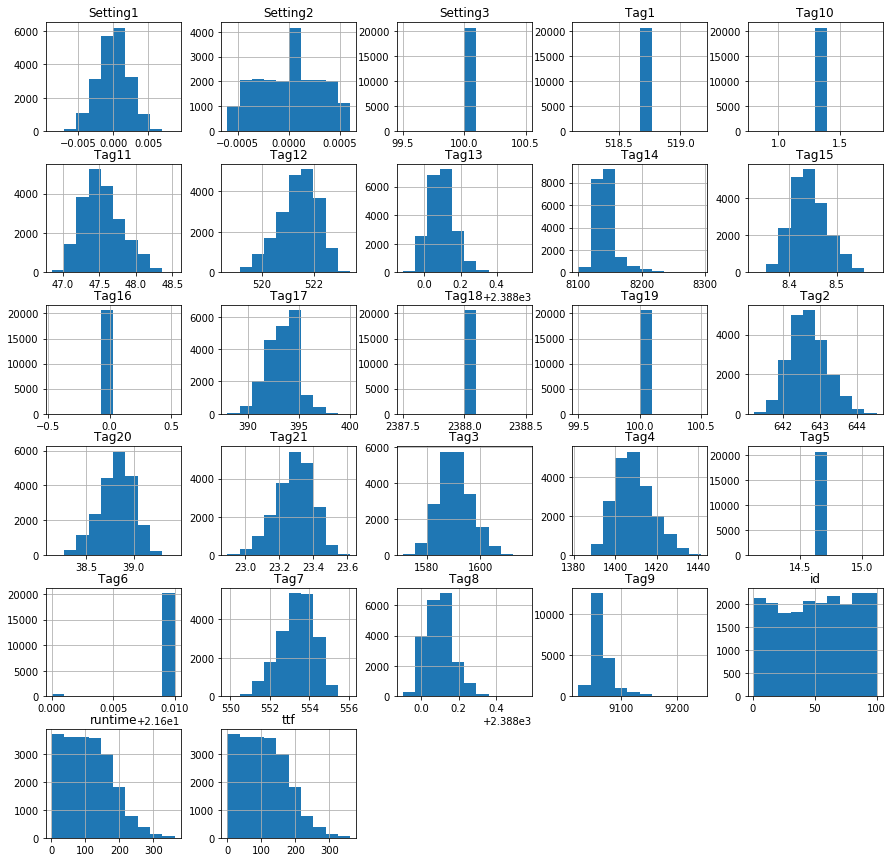

In [12]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
df_train.hist(ax=ax);

In [13]:
df_train2 = df_train.drop(['Setting3', 'Tag1', 'Tag10', 'Tag16', 'Tag18', 'Tag19','Tag5', 'Tag6'], axis=1)

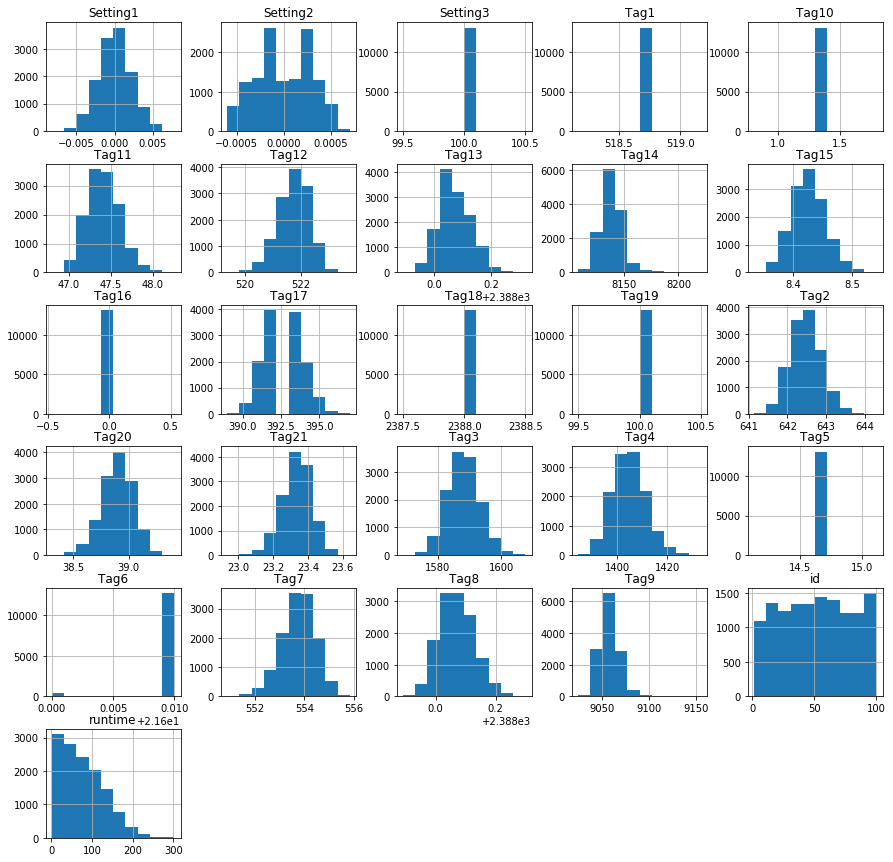

In [14]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
df_test.hist(ax=ax);

In [15]:
df_test2 = df_test.drop(['Setting3', 'Tag1', 'Tag10', 'Tag16', 'Tag18', 'Tag19','Tag5', 'Tag6'], axis=1)

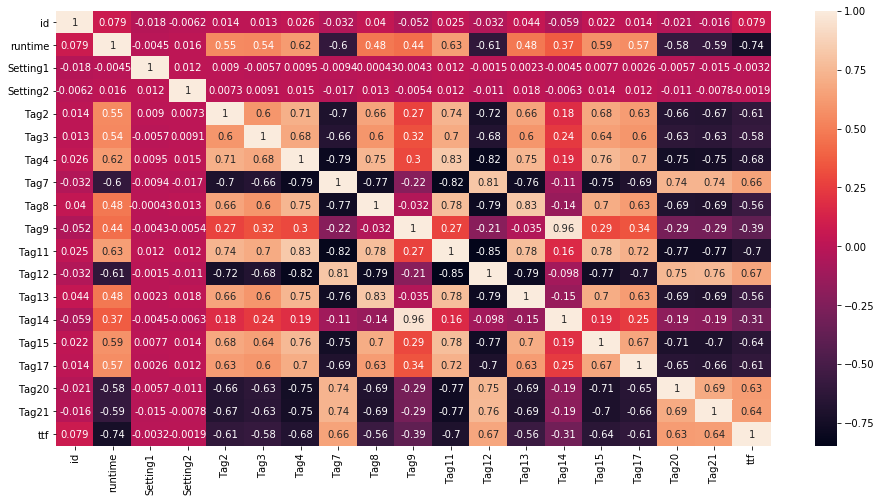

In [16]:
corr = df_train2.corr()
plt.figure(figsize=(16,8))
sns.heatmap(corr, annot=True);

In [17]:
df_train2 = df_train.drop(['Setting1', 'Setting2'], axis=1)
df_test2 = df_test.drop(['Setting1', 'Setting2'], axis=1)

In [60]:
mm = MinMaxScaler()

In [61]:
X = df_train2.drop(['ttf'], axis=1)

In [62]:
df_train_mm = mm.fit_transform(X.values)

# Machine Learning

In [63]:
X = df_train_mm
y = df_train['ttf']

In [64]:
kfold = KFold(n_splits=5)
ln = LinearRegression()
rf = RandomForestRegressor()
xb = GradientBoostingRegressor()
et = ExtraTreesRegressor()

In [65]:
scores_ln = cross_val_score(ln, X, y, cv = kfold)
scores_rf = cross_val_score(rf, X, y, cv = kfold)
scores_xb = cross_val_score(xb, X, y, cv = kfold)
scores_et = cross_val_score(et, X, y, cv = kfold)

In [66]:
print ("Regressão Linear:", scores_ln.mean())
print ("Random Forest Regressor:", scores_rf.mean())
print ("GradientBoostingRegressor:", scores_xb.mean())
print ("Extra Tree:", scores_et.mean())

Regressão Linear: 0.6452418414714121
Random Forest Regressor: 0.5693993889154542
GradientBoostingRegressor: 0.6746296269884401
Extra Tree: 0.6408491895023788


## Modelo RandomForestRegressor

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [68]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [69]:
pred_rf = rf.predict(X_test)

In [70]:
MAE = mean_absolute_error(y_test, pred_rf)
MAE

11.376837921675067

In [71]:
R2 = r2_score(y_test, pred_rf)
R2

0.9397797798054328

In [72]:
RMSE = mean_squared_error(y_test, pred_rf)
RMSE

276.0368510081427

# Previsões

In [73]:
rf.fit(X, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [74]:
df_test3 = df_test2.copy()

In [75]:
df_test3 = mm.fit_transform(df_test3.values)

In [76]:
predict = rf.predict(df_test3)

In [77]:
predict = pd.DataFrame(predict)

In [78]:
df_test4 = pd.concat([df_test2,predict], axis=1 )

In [79]:
df_max_cycle = pd.DataFrame(df_test4.groupby('id')[0].min())

In [80]:
df_max_cycle

,0
id,
1,150.52
2,122.88
3,14.00
4,33.42
5,36.87
6,46.43
7,39.12
8,38.50
9,103.29


In [81]:
df_max_cycle = df_max_cycle.rename(columns={0: 'predict'})

In [85]:
df_max_cycle.to_csv('regressao_Marco_Albuquerque.csv', index=False)

# Conclusão

O Modelo tem um erro de 11 ciclos que podem ser para mais ou para menos. Para garantir o funcionamento, a troca deve ser feita sempre com esse intervalo de confiança.